PHASE 2 PROJECT.

HERE WE ARE GOING TO ANALYSE THE MOVIES AND THE GENRE THAT ARE THE MOST POPULAR AND GIVE RECOMENDATIONS TO THE INVESTORS ON WHAT STUDIO SET TO INVEST IN.

THIS IS THE ANALYSIS OF IMDB DATA AND ITS RECOMENDATIONS.

In [2]:
#IMPORTING THE NECESSARY TOOLS FOR ANALYSIS
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import pickle

In [3]:
# for data analysis and manipulation
import pandas as pd
# for numerical operations 
import numpy as np
# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv(r'C:\Users\leezy\Documents\dsc-phase-2-project-v3\zippedData\using\bom.movie_gross.csv')
df.head(30)

title   studio  \
0                                         Toy Story 3       BV   
1                          Alice in Wonderland (2010)       BV   
2         Harry Potter and the Deathly Hallows Part 1       WB   
3                                           Inception       WB   
4                                 Shrek Forever After     P/DW   
5                          The Twilight Saga: Eclipse     Sum.   
6                                          Iron Man 2     Par.   
7                                             Tangled       BV   
8                                       Despicable Me     Uni.   
9                            How to Train Your Dragon     P/DW   
10                         Clash of the Titans (2010)       WB   
11  The Chronicles of Narnia: The Voyage of the Da...      Fox   
12                                  The King's Speech    Wein.   
13                                        Tron Legacy       BV   
14                                     The Karate Kid     Sony   
15                Prince of Persia: The Sands of Time       BV   
16                                         Black Swan     FoxS   
17                                           Megamind     P/DW   
18                                         Robin Hood     Uni.   
19                                 The Last Airbender     Par.   
20                                     Little Fockers     Uni.   
21                           Resident Evil: Afterlife     SGem   
22                                     Shutter Island     Par.   
23                                               Salt     Sony   
24                                 Sex and the City 2  WB (NL)   
25                                        The Tourist     Sony   
26                                    The Expendables      LGF   
27                                          Grown Ups     Sony   
28                                       Knight & Day      Fox   
29                                          True Grit     Par.   

    domestic_gross foreign_gross  year  
0      415000000.0     652000000  2010  
1      334200000.0     691300000  2010  
2      296000000.0     664300000  2010  
3      292600000.0     535700000  2010  
4      238700000.0     513900000  2010  
5      300500000.0     398000000  2010  
6      312400000.0     311500000  2010  
7      200800000.0     391000000  2010  
8      251500000.0     291600000  2010  
9      217600000.0     277300000  2010  
10     163200000.0     330000000  2010  
11     104400000.0     311300000  2010  
12     135500000.0     275400000  2010  
13     172100000.0     228000000  2010  
14     176600000.0     182500000  2010  
15      90800000.0     245600000  2010  
16     107000000.0     222400000  2010  
17     148400000.0     173500000  2010  
18     105300000.0     216400000  2010  
19     131800000.0     187900000  2010  
20     148400000.0     162200000  2010  
21      60100000.0     240100000  2010  
22     128000000.0     166800000  2010  
23     118300000.0     175200000  2010  
24      95300000.0     193000000  2010  
25      67600000.0     210700000  2010  
26     103100000.0     171400000  2010  
27     162000000.0     109400000  2010  
28      76400000.0     185500000  2010  
29     171200000.0      81000000  2010

In [5]:
df = pd.read_csv(r'C:\Users\leezy\Documents\dsc-phase-2-project-v3\zippedData\tmdb.movies.csv')
df.head(30)

Unnamed: 0                 genre_ids     id original_language  \
0            0           [12, 14, 10751]  12444                en   
1            1       [14, 12, 16, 10751]  10191                en   
2            2             [12, 28, 878]  10138                en   
3            3           [16, 35, 10751]    862                en   
4            4             [28, 878, 12]  27205                en   
5            5           [12, 14, 10751]  32657                en   
6            6         [28, 12, 14, 878]  19995                en   
7            7           [16, 10751, 35]  10193                en   
8            8           [16, 10751, 35]  20352                en   
9            9  [16, 28, 35, 10751, 878]  38055                en   
10          10           [16, 35, 10751]    863                en   
11          11           [10751, 14, 12]  12155                en   
12          12              [53, 12, 28]  27578                en   
13          13               [16, 10751]  38757                en   
14          14                  [27, 80]  41439                en   
15          15       [12, 14, 18, 10749]  24021                en   
16          16             [28, 53, 878]  20504                en   
17          17            [10402, 10749]  52371                nl   
18          18              [28, 18, 53]   2502                en   
19          19            [18, 53, 9648]  11324                en   
20          20        [28, 18, 9648, 53]   2501                en   
21          21                  [28, 35]  37834                en   
22          22           [12, 10751, 14]  10140                en   
23          23               [18, 10749]  41233                en   
24          24      [53, 28, 12, 35, 80]  34544                en   
25          25                  [18, 36]  45269                en   
26          26          [28, 35, 80, 53]   9737                en   
27          27       [28, 12, 10751, 14]  10196                en   
28          28         [28, 878, 12, 53]  34851                en   
29          29                      [18]  37799                en   

                                       original_title  popularity  \
0        Harry Potter and the Deathly Hallows: Part 1      33.533   
1                            How to Train Your Dragon      28.734   
2                                          Iron Man 2      28.515   
3                                           Toy Story      28.005   
4                                           Inception      27.920   
5   Percy Jackson & the Olympians: The Lightning T...      26.691   
6                                              Avatar      26.526   
7                                         Toy Story 3      24.445   
8                                       Despicable Me      23.673   
9                                            Megamind      22.855   
10                                        Toy Story 2      22.698   
11                                Alice in Wonderland      22.020   
12                                    The Expendables      21.517   
13                                            Tangled      21.511   
14                                             Saw 3D      20.370   
15                         The Twilight Saga: Eclipse      20.340   
16                                    The Book of Eli      18.985   
17                                         LelleBelle      18.586   
18                               The Bourne Supremacy      18.199   
19                                     Shutter Island      18.060   
20                                The Bourne Identity      17.935   
21                                     Knight and Day      17.713   
22  The Chronicles of Narnia: The Voyage of the Da...      17.382   
23                                         Step Up 3D      17.174   
24                                         The A-Team      17.097   
25                                  The King's Speech      16.798   
2

In [6]:
import pandas as pd

# Load the CSV files into DataFrames
df1 = pd.read_csv(r'C:\Users\leezy\Documents\dsc-phase-2-project-v3\zippedData\using\bom.movie_gross.csv')
df2 = pd.read_csv(r'C:\Users\leezy\Documents\dsc-phase-2-project-v3\zippedData\tmdb.movies.csv')

# Print columns of both DataFrames
print("DF1 Columns:")
print(df1.columns)
print("\nDF2 Columns:")
print(df2.columns)


DF1 Columns:
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

DF2 Columns:
Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')


FROM THIS INITIAL DATA WE FIND THAT THE TOP FIVE MOVIES THAT DID WELL ARE;

HARRY POTTER

HOW TO TRAIN YOUR DRAGON

IRON MAN

TOY STORY 

INCEPTION STORY 

INCEPTION

In [7]:
import pandas as pd

# Load the CSV files into DataFrames
df1 = pd.read_csv(r'C:\Users\leezy\Documents\dsc-phase-2-project-v3\zippedData\using\bom.movie_gross.csv')
df2 = pd.read_csv(r'C:\Users\leezy\Documents\dsc-phase-2-project-v3\zippedData\tmdb.movies.csv')

# Print columns to verify the presence of 'title'
print("DF1 Columns:")
print(df1.columns)
print("\nDF2 Columns:")
print(df2.columns)

# Merge DataFrames on the 'title' column
# Make sure 'title' exists in both DataFrames
merged_df = pd.merge(df1, df2, left_on='title', right_on='original_title', how='inner')

# Display the first few rows of the merged DataFrame
print("\nMerged DataFrame:")
print(merged_df.head(30))

# save the merged DataFrame to a new CSV file
merged_df.to_csv(r'C:\Users\leezy\Documents\dsc-phase-2-project-v3\zippedData\merged_movies.csv', index=False)


DF1 Columns:
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

DF2 Columns:
Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

Merged DataFrame:
                                              title_x   studio  \
0                                         Toy Story 3       BV   
1                                           Inception       WB   
2                                 Shrek Forever After     P/DW   
3                          The Twilight Saga: Eclipse     Sum.   
4                                          Iron Man 2     Par.   
5                                             Tangled       BV   
6                                       Despicable Me     Uni.   
7                            How to Train Your Dragon     P/DW   
8   The Chronicles of Narnia: The Voyage of the Da...      Fox   
9                             

In [8]:
merged_df.head(30)

title_x   studio  \
0                                         Toy Story 3       BV   
1                                           Inception       WB   
2                                 Shrek Forever After     P/DW   
3                          The Twilight Saga: Eclipse     Sum.   
4                                          Iron Man 2     Par.   
5                                             Tangled       BV   
6                                       Despicable Me     Uni.   
7                            How to Train Your Dragon     P/DW   
8   The Chronicles of Narnia: The Voyage of the Da...      Fox   
9                                   The King's Speech    Wein.   
10                                     The Karate Kid     Sony   
11                Prince of Persia: The Sands of Time       BV   
12                                         Black Swan     FoxS   
13                                           Megamind     P/DW   
14                                         Robin Hood     Uni.   
15                                         Robin Hood     Uni.   
16                                 The Last Airbender     Par.   
17                                     Little Fockers     Uni.   
18                           Resident Evil: Afterlife     SGem   
19                                     Shutter Island     Par.   
20                                               Salt     Sony   
21                                               Salt     Sony   
22                                 Sex and the City 2  WB (NL)   
23                                        The Tourist     Sony   
24                                    The Expendables      LGF   
25                                          Grown Ups     Sony   
26                                          True Grit     Par.   
27                                 Gulliver's Travels      Fox   
28                                 The Social Network     Sony   
29                                    Valentine's Day  WB (NL)   

    domestic_gross foreign_gross  year  Unnamed: 0                 genre_ids  \
0      415000000.0     652000000  2010           7           [16, 10751, 35]   
1      292600000.0     535700000  2010           4             [28, 878, 12]   
2      238700000.0     513900000  2010          38   [35, 12, 14, 16, 10751]   
3      300500000.0     398000000  2010          15       [12, 14, 18, 10749]   
4      312400000.0     311500000  2010           2             [12, 28, 878]   
5      200800000.0     391000000  2010          13               [16, 10751]   
6      251500000.0     291600000  2010           8           [16, 10751, 35]   
7      217600000.0     277300000  2010           1       [14, 12, 16, 10751]   
8      104400000.0     311300000  2010          22           [12, 10751, 14]   
9      135500000.0     275400000  2010          25                  [18, 36]   
10     176600000.0     182500000  2010          76       [28, 12, 18, 10751]   
11      90800000.0     245600000  2010          55       [12, 14, 28, 10749]   
12     107000000.0     222400000  2010          47                  [18, 53]   
13     148400000.0     173500000  2010           9  [16, 28, 35, 10751, 878]   
14     105300000.0     216400000  2010          36              [28, 12, 18]   
15     105300000.0     216400000  2010       23822              [12, 28, 53]   
16     131800000.0     187900000  2010          27       [28, 12, 10751, 14]   
17     148400000.0     162200000  2010          80               [35, 10749]   
18      60100000.0     240100000  2010        1629         [28, 12, 27, 878]   
19     128000000.0     166800000  2010          19            [18, 53, 9648]   
20     118300000.0     175200000  2010          63            [28, 9648, 53]   
21     118300000.0     175200000  2010        6948                  [53, 80]   
22      95300000.0     193000000  2010         137           [35, 18, 10749]   
23      67600000.0     210700000  2010         118           [28, 53, 10749]   

In [9]:
# Create a new column 'title_combined' with combined values from 'title_x' and 'title_y'
merged_df['title_combined'] = merged_df['title_x'].combine_first(merged_df['title_y'])

# Drop the original title columns if they are no longer needed
merged_df = merged_df.drop(columns=['title_x', 'title_y'])

# Display the first few rows of the updated DataFrame
print("\nUpdated DataFrame:")
print(merged_df.head(30))



Updated DataFrame:
     studio  domestic_gross foreign_gross  year  Unnamed: 0  \
0        BV     415000000.0     652000000  2010           7   
1        WB     292600000.0     535700000  2010           4   
2      P/DW     238700000.0     513900000  2010          38   
3      Sum.     300500000.0     398000000  2010          15   
4      Par.     312400000.0     311500000  2010           2   
5        BV     200800000.0     391000000  2010          13   
6      Uni.     251500000.0     291600000  2010           8   
7      P/DW     217600000.0     277300000  2010           1   
8       Fox     104400000.0     311300000  2010          22   
9     Wein.     135500000.0     275400000  2010          25   
10     Sony     176600000.0     182500000  2010          76   
11       BV      90800000.0     245600000  2010          55   
12     FoxS     107000000.0     222400000  2010          47   
13     P/DW     148400000.0     173500000  2010           9   
14     Uni.     105300000.0     216

In [10]:
# Save the updated DataFrame to a new CSV file
merged_df.to_csv(r'C:\Users\leezy\Documents\dsc-phase-2-project-v3\zippedData\merged_movies_updated.csv', index=False)


In [11]:
merged_df.head(20)

studio  domestic_gross foreign_gross  year  Unnamed: 0  \
0      BV     415000000.0     652000000  2010           7   
1      WB     292600000.0     535700000  2010           4   
2    P/DW     238700000.0     513900000  2010          38   
3    Sum.     300500000.0     398000000  2010          15   
4    Par.     312400000.0     311500000  2010           2   
5      BV     200800000.0     391000000  2010          13   
6    Uni.     251500000.0     291600000  2010           8   
7    P/DW     217600000.0     277300000  2010           1   
8     Fox     104400000.0     311300000  2010          22   
9   Wein.     135500000.0     275400000  2010          25   
10   Sony     176600000.0     182500000  2010          76   
11     BV      90800000.0     245600000  2010          55   
12   FoxS     107000000.0     222400000  2010          47   
13   P/DW     148400000.0     173500000  2010           9   
14   Uni.     105300000.0     216400000  2010          36   
15   Uni.     105300000.0     216400000  2010       23822   
16   Par.     131800000.0     187900000  2010          27   
17   Uni.     148400000.0     162200000  2010          80   
18   SGem      60100000.0     240100000  2010        1629   
19   Par.     128000000.0     166800000  2010          19   

                   genre_ids      id original_language  \
0            [16, 10751, 35]   10193                en   
1              [28, 878, 12]   27205                en   
2    [35, 12, 14, 16, 10751]   10192                en   
3        [12, 14, 18, 10749]   24021                en   
4              [12, 28, 878]   10138                en   
5                [16, 10751]   38757                en   
6            [16, 10751, 35]   20352                en   
7        [14, 12, 16, 10751]   10191                en   
8            [12, 10751, 14]   10140                en   
9                   [18, 36]   45269                en   
10       [28, 12, 18, 10751]   38575                en   
11       [12, 14, 28, 10749]    9543                en   
12                  [18, 53]   44214                en   
13  [16, 28, 35, 10751, 878]   38055                en   
14              [28, 12, 18]   20662                en   
15              [12, 28, 53]  375588                en   
16       [28, 12, 10751, 14]   10196                en   
17               [35, 10749]   39451                en   
18         [28, 12, 27, 878]   35791                en   
19            [18, 53, 9648]   11324                en   

                                       original_title  popularity  \
0                                         Toy Story 3      24.445   
1                                           Inception      27.920   
2                                 Shrek Forever After      15.041   
3                          The Twilight Saga: Eclipse      20.340   
4                                          Iron Man 2      28.515   
5                                             Tangled      21.511   
6                                       Despicable Me      23.673   
7                            How to Train Your Dragon      28.734   
8   The Chronicles of Narnia: The Voyage of the Da...      17.382   
9                                   The King's Speech      16.798   
10                                     The Karate Kid      12.256   
11                Prince of Persia: The Sands of Time      13.440   
12                                         Black Swan      13.745   
13                                           Megamind      22.855   
14                                         Robin Hood      15.444   
15                                         Robin Hood      39.975   
16                                 The Last Airbender      16.595   
17                                     Little Fockers      12.153   
18                           Resident Evil: Afterlife       0.667   
19                                     Shutter Island      18.060   

   release_date  vote_average  vote_count  \
0    20

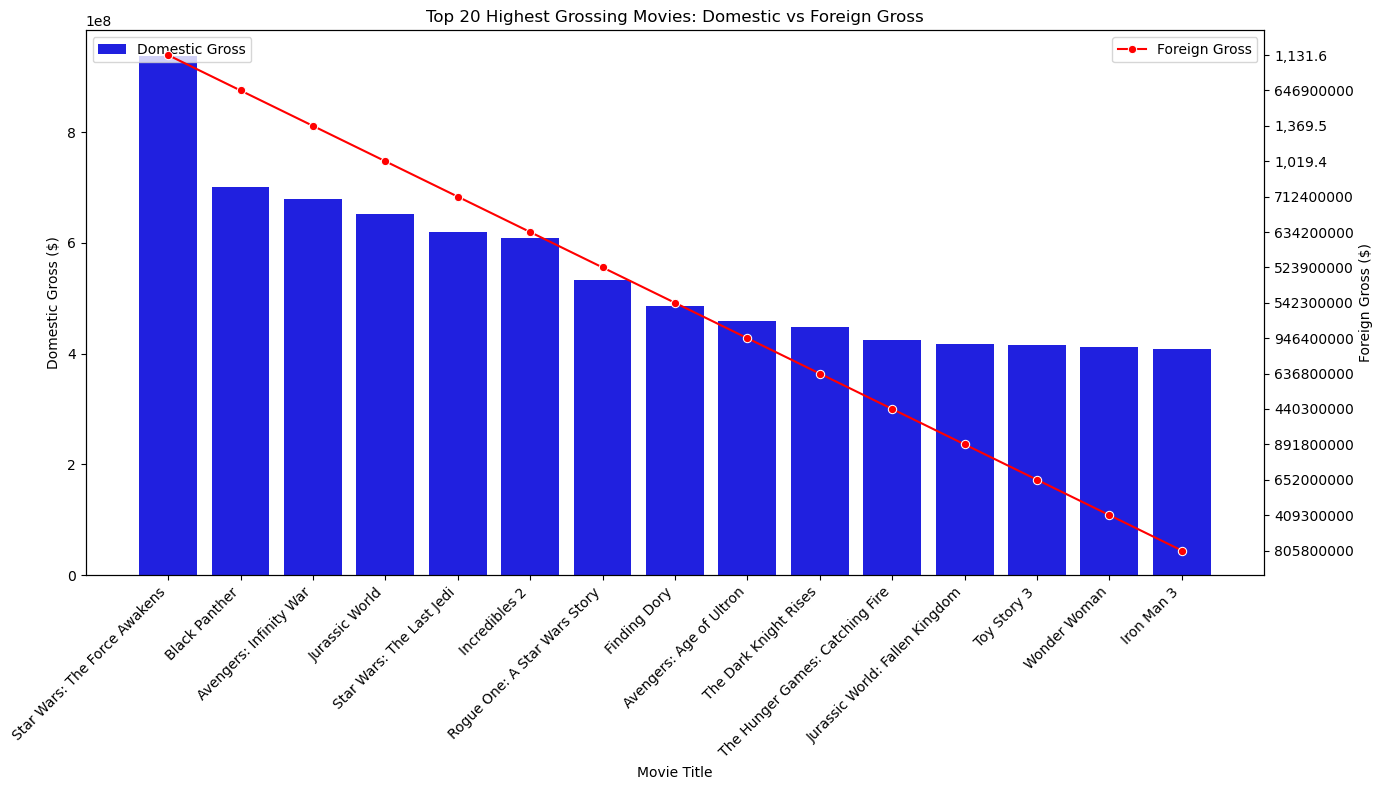

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Sort DataFrame by 'domestic_gross' in descending order
df_sorted = merged_df.sort_values(by='domestic_gross', ascending=False).head(20)

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot bars for domestic gross
sns.barplot(x='title_combined', y='domestic_gross', data=df_sorted, ax=ax1, color='b', label='Domestic Gross')

# Create a second y-axis for the line plot
ax2 = ax1.twinx()

# Plot line for foreign gross
sns.lineplot(x='title_combined', y='foreign_gross', data=df_sorted, ax=ax2, color='r', marker='o', label='Foreign Gross')

# Customize the plot
ax1.set_xlabel('Movie Title')
ax1.set_ylabel('Domestic Gross ($)')
ax2.set_ylabel('Foreign Gross ($)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Top 20 Highest Grossing Movies: Domestic vs Foreign Gross')
plt.tight_layout()

# Show the plot
plt.show()


STAR WARS WHICH IS AN SCIFI ACTION MOVIE HAS A HIGHEST GROSS BOTH DOMESTICALLY AND INTERNATIONALLY.

THIS IS FOLLOWED BY BLACK PANTHER AND INFINITY WAR THAT ARE ON THE SAME GENRE OF MOVIES.

THERE ARE 3 ANIMATIONS ON THE TOP 20 THAT ARE MAKING PROFITS I.E INCREDIBLES, FINDING DORY AND TOY STORY.

THE GROSS OF MOVIES IS SIGNIFICANTLY HIGHER IN DOMESTIC THAN FOREIGN BUT EXCLUDING THE 6 FIRST MOVIES THAT HAVE GREAT SUCCESS FOREIGN GROSS. 

In [13]:
df_sorted.head(5)

studio  domestic_gross foreign_gross  year  Unnamed: 0  \
1187     BV     936700000.0       1,131.6  2015       17385   
1186     BV     936700000.0       1,131.6  2015       14172   
2100     BV     700100000.0     646900000  2018       23817   
2099     BV     700100000.0     646900000  2018        3444   
2098     BV     678800000.0       1,369.5  2018       23811   

              genre_ids      id original_language  \
1187  [28, 12, 878, 14]  140607                en   
1186  [28, 12, 878, 14]  140607                en   
2100  [28, 12, 14, 878]  284054                en   
2099           [28, 16]   86841                en   
2098       [12, 28, 14]  299536                en   

                    original_title  popularity release_date  vote_average  \
1187  Star Wars: The Force Awakens      32.281   2015-12-18           7.4   
1186  Star Wars: The Force Awakens      32.281   2015-12-18           7.4   
2100                 Black Panther      44.140   2018-02-16           7.4   
2099                 Black Panther       2.058   2011-01-18           5.1   
2098        Avengers: Infinity War      80.773   2018-04-27           8.3   

      vote_count                title_combined  
1187       12641  Star Wars: The Force Awakens  
1186       12641  Star Wars: The Force Awakens  
2100       12365                 Black Panther  
2099          11                 Black Panther  
2098       13948        Avengers: Infinity War

In [14]:
import pandas as pd

# Load your DataFrame
# merged_df 

# 'studio', 'vote_average', and 'vote_count' columns are present in the DataFrame

# Aggregate by studio
studio_aggregates = merged_df.groupby('studio').agg(
    average_vote=('vote_average', 'mean'),
    total_votes=('vote_count', 'sum')
).reset_index()

# Sort by average_vote and total_votes in descending order
sorted_studios = studio_aggregates.sort_values(by=['average_vote', 'total_votes'], ascending=[False, False])

# Select the top 10 studios
top_10_studios = sorted_studios.head(10)

# Display the results
print(top_10_studios)


        studio  average_vote  total_votes
124         RF      8.700000            3
69   Good Deed      8.200000         2400
110      Orion      7.800000          321
169       Yash      7.800000            3
116        PDA      7.733333         1177
17       Arth.      7.700000           51
153        U/P      7.600000         3188
36   Cleopatra      7.500000         1000
131         SD      7.500000          196
134        SHO      7.500000           73


In [15]:
top_10_studios.head(20)

studio  average_vote  total_votes
124         RF      8.700000            3
69   Good Deed      8.200000         2400
110      Orion      7.800000          321
169       Yash      7.800000            3
116        PDA      7.733333         1177
17       Arth.      7.700000           51
153        U/P      7.600000         3188
36   Cleopatra      7.500000         1000
131         SD      7.500000          196
134        SHO      7.500000           73

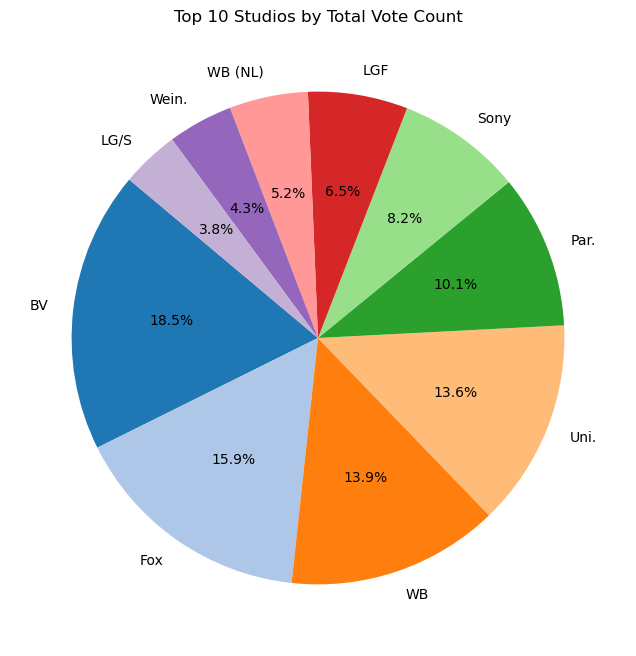

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


# Aggregate by studio
studio_aggregates = merged_df.groupby('studio').agg(
    average_vote=('vote_average', 'mean'),
    total_votes=('vote_count', 'sum')
).reset_index()

# Sort by total_votes in descending order
sorted_studios = studio_aggregates.sort_values(by='total_votes', ascending=False)

# Select the top 10 studios
top_10_studios = sorted_studios.head(10)

# Plot a pie chart
fig, ax = plt.subplots(figsize=(10, 8))

# Pie chart
ax.pie(top_10_studios['total_votes'], 
       labels=top_10_studios['studio'], 
       autopct='%1.1f%%', 
       startangle=140, 
       colors=plt.cm.tab20.colors)

# Title
ax.set_title('Top 10 Studios by Total Vote Count')

plt.show()


WE RECOMMEND BV STUDIOS TO OUR INVESTORS.

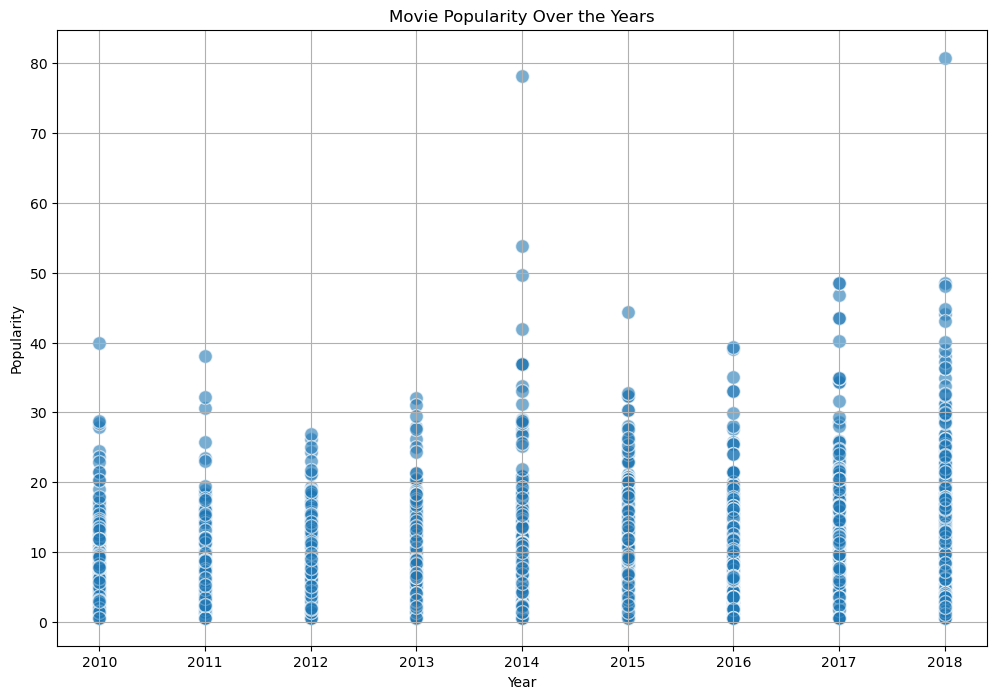

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


# Ensure that 'popularity' and 'year' columns are present in the DataFrame

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot
ax.scatter(merged_df['year'], merged_df['popularity'], alpha=0.6, edgecolors='w', s=100)

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Popularity')
ax.set_title('Movie Popularity Over the Years')

# Show grid
ax.grid(True)

# Show plot
plt.show()


THERE IS SIGNIFICANT INCREASE IN THE NUMBER OF MIVIES BEING WATCHED FROM 2010 TO 2018 WITH A PEAK HIGH IN 2018 WITH A POPULARITY OF 80.

In [18]:
pip install pandas numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load DataFrame
# merged_df

# Ensure the DataFrame contains necessary columns
# Clean data 
data = merged_df[['popularity', 'vote_average']].dropna()

# Sort data by 'popularity' (or any other criterion) and select the top 20
top_20_data = data.sort_values(by='popularity', ascending=False).head(20)

# Separate features (X) and target (y)
X = top_20_data[['vote_average']]  # Feature
y = top_20_data['popularity']      # Target


In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 260.4566087361488
R^2 Score: -0.029365615217444185


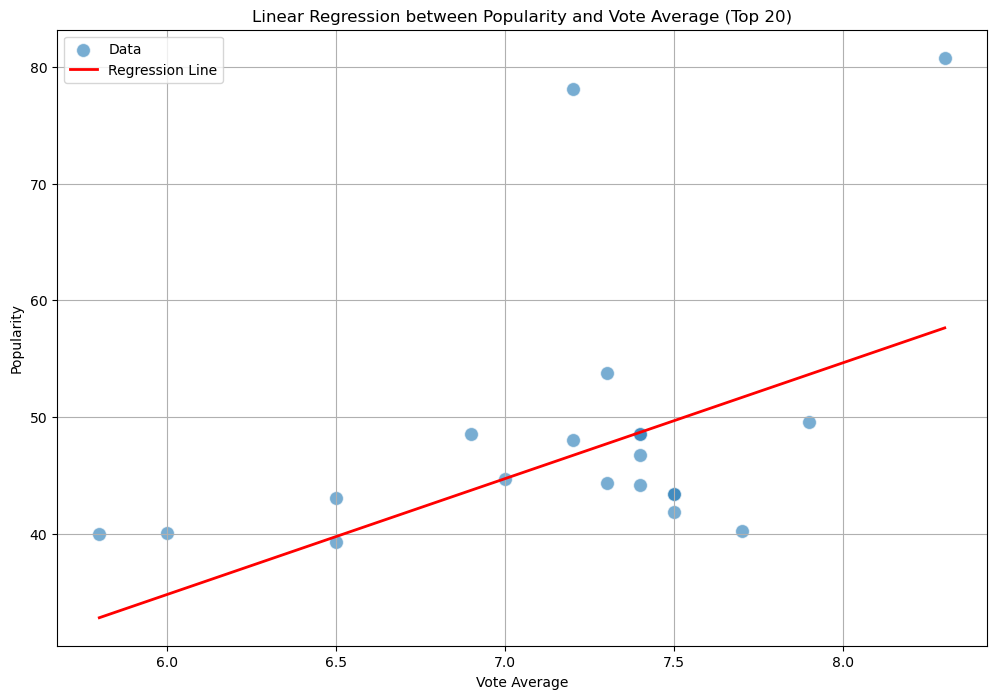

In [21]:
# Plot
plt.figure(figsize=(12, 8))

# Scatter plot of the original data
sns.scatterplot(data=top_20_data, x='vote_average', y='popularity', alpha=0.6, edgecolor='w', s=100, label='Data')

# Plot the regression line
x_range = np.linspace(top_20_data['vote_average'].min(), top_20_data['vote_average'].max(), 100).reshape(-1, 1)
y_range = model.predict(x_range)
plt.plot(x_range, y_range, color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.title('Linear Regression between Popularity and Vote Average (Top 20)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [22]:


# Sample data for demonstration
# merged_df

# Define bins and labels
bins = [0, 5, 6, 7, 8, 10]  # Adjust bins based on your data distribution
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Create a new column 'vote_average_category'
merged_df['vote_average_category'] = pd.cut(merged_df['vote_average'], bins=bins, labels=labels)

# Group data by 'vote_average_category'
grouped_data = merged_df.groupby('vote_average_category')['popularity'].apply(list)

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Print results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')


F-statistic: 37.76846132230437
P-value: 1.2438797969740367e-30


FROM THE ANOVA WE FIND AN AVERAGE POPULARITY OF 37.768.

In [38]:
import sqlite3

In [39]:
import pandas as pd
import numpy as np
import sqlite3 as sql

In [40]:
con = sqlite3.connect('im.db')

In [41]:
cursor = con.cursor()

In [42]:
query = "SELECT * FROM persons"

In [43]:
cursor.execute(query)

In [44]:
cursor.fetchall()

[('nm0061671',
  'Mary Ellen Bauder',
  None,
  None,
  'miscellaneous,production_manager,producer'),
 ('nm0061865',
  'Joseph Bauer',
  None,
  None,
  'composer,music_department,sound_department'),
 ('nm0062070', 'Bruce Baum', None, None, 'miscellaneous,actor,writer'),
 ('nm0062195',
  'Axel Baumann',
  None,
  None,
  'camera_department,cinematographer,art_department'),
 ('nm0062798',
  'Pete Baxter',
  None,
  None,
  'production_designer,art_department,set_decorator'),
 ('nm0062879',
  'Ruel S. Bayani',
  None,
  None,
  'director,production_manager,miscellaneous'),
 ('nm0063198', 'Bayou', None, None, 'actor'),
 ('nm0063432', 'Stevie Be-Zet', None, None, 'composer,soundtrack'),
 ('nm0063618',
  'Jeff Beal',
  1963.0,
  None,
  'composer,music_department,soundtrack'),
 ('nm0063750', 'Lindsay Beamish', None, None, 'actress,miscellaneous'),
 ('nm0064023', 'Bryan Beasley', None, None, 'director,producer,writer'),
 ('nm0064350',
  'Martine Beauchemin',
  None,
  None,
  'producer,produ

In [45]:
import pandas as pd
persons_df = pd.read_sql(query, con)
persons_df.head(10)

person_id       primary_name  birth_year  death_year  \
0  nm0061671  Mary Ellen Bauder         NaN         NaN   
1  nm0061865       Joseph Bauer         NaN         NaN   
2  nm0062070         Bruce Baum         NaN         NaN   
3  nm0062195       Axel Baumann         NaN         NaN   
4  nm0062798        Pete Baxter         NaN         NaN   
5  nm0062879     Ruel S. Bayani         NaN         NaN   
6  nm0063198              Bayou         NaN         NaN   
7  nm0063432      Stevie Be-Zet         NaN         NaN   
8  nm0063618          Jeff Beal      1963.0         NaN   
9  nm0063750    Lindsay Beamish         NaN         NaN   

                                 primary_profession  
0         miscellaneous,production_manager,producer  
1        composer,music_department,sound_department  
2                        miscellaneous,actor,writer  
3  camera_department,cinematographer,art_department  
4  production_designer,art_department,set_decorator  
5         director,production_manager,miscellaneous  
6                                             actor  
7                               composer,soundtrack  
8              composer,music_department,soundtrack  
9                             actress,miscellaneous

In [46]:
pd.read_sql("""
SELECT primary_profession, primary_name
  FROM persons;
""", con).head()

primary_profession       primary_name
0         miscellaneous,production_manager,producer  Mary Ellen Bauder
1        composer,music_department,sound_department       Joseph Bauer
2                        miscellaneous,actor,writer         Bruce Baum
3  camera_department,cinematographer,art_department       Axel Baumann
4  production_designer,art_department,set_decorator        Pete Baxter

In [47]:
query = "SELECT * FROM movie_ratings"

In [48]:
cursor.execute(query)

In [49]:
cursor.fetchall()

[('tt10356526', 8.3, 31),
 ('tt10384606', 8.9, 559),
 ('tt1042974', 6.4, 20),
 ('tt1043726', 4.2, 50352),
 ('tt1060240', 6.5, 21),
 ('tt1069246', 6.2, 326),
 ('tt1094666', 7.0, 1613),
 ('tt1130982', 6.4, 571),
 ('tt1156528', 7.2, 265),
 ('tt1161457', 4.2, 148),
 ('tt1171222', 5.1, 8296),
 ('tt1174693', 5.8, 2381),
 ('tt1181840', 7.0, 5494),
 ('tt1193623', 8.0, 5),
 ('tt1199588', 5.5, 74),
 ('tt1204784', 5.8, 6),
 ('tt1210166', 7.6, 326657),
 ('tt1212419', 6.5, 87288),
 ('tt1220911', 5.0, 941),
 ('tt1229238', 7.4, 428142),
 ('tt1232829', 7.2, 477771),
 ('tt1235548', 6.6, 2725),
 ('tt1243974', 5.4, 54646),
 ('tt1250861', 6.2, 416),
 ('tt1258812', 4.0, 21),
 ('tt1261945', 4.4, 69199),
 ('tt1266037', 7.0, 1413),
 ('tt1270291', 5.8, 5728),
 ('tt1270761', 5.6, 44490),
 ('tt1272886', 6.1, 6688),
 ('tt1274297', 5.4, 381),
 ('tt1283887', 5.4, 2527),
 ('tt1285219', 3.4, 387),
 ('tt1287879', 7.7, 76),
 ('tt1290476', 7.2, 6),
 ('tt1294141', 4.5, 113),
 ('tt1320239', 6.2, 18431),
 ('tt1322312', 6.3

In [50]:
import pandas as pd
movie_ratings_df = pd.read_sql(query, con)
movie_ratings_df.head(20)

movie_id  averagerating  numvotes
0   tt10356526            8.3        31
1   tt10384606            8.9       559
2    tt1042974            6.4        20
3    tt1043726            4.2     50352
4    tt1060240            6.5        21
5    tt1069246            6.2       326
6    tt1094666            7.0      1613
7    tt1130982            6.4       571
8    tt1156528            7.2       265
9    tt1161457            4.2       148
10   tt1171222            5.1      8296
11   tt1174693            5.8      2381
12   tt1181840            7.0      5494
13   tt1193623            8.0         5
14   tt1199588            5.5        74
15   tt1204784            5.8         6
16   tt1210166            7.6    326657
17   tt1212419            6.5     87288
18   tt1220911            5.0       941
19   tt1229238            7.4    428142

IN THIS DATABASE WE HAVE THE FIRST 20 MOVIES BASED ON THE ID AND WE WILL PROCEED TO ANALYSE IT.

In [51]:
# 'movie_ratings_df' is your DataFrame
# Sort the DataFrame by 'numvotes' in descending order
sorted_df = movie_ratings_df.sort_values(by='numvotes', ascending=False)

# Select the top 10 rows
top_10_df = sorted_df.head(10)

# Display the top 10 rows
print(top_10_df)
top_10_df.head(10)

        movie_id  averagerating  numvotes
63498  tt1375666            8.8   1841066
8738   tt1345836            8.4   1387769
24920  tt0816692            8.6   1299334
38058  tt1853728            8.4   1211405
48221  tt0848228            8.1   1183655
39356  tt0993846            8.2   1035358
3140   tt1130884            8.1   1005960
25777  tt2015381            8.1    948394
60518  tt1431045            8.0    820847
63506  tt1392170            7.2    795227


movie_id  averagerating  numvotes
63498  tt1375666            8.8   1841066
8738   tt1345836            8.4   1387769
24920  tt0816692            8.6   1299334
38058  tt1853728            8.4   1211405
48221  tt0848228            8.1   1183655
39356  tt0993846            8.2   1035358
3140   tt1130884            8.1   1005960
25777  tt2015381            8.1    948394
60518  tt1431045            8.0    820847
63506  tt1392170            7.2    795227

WE ARE CREATING A LINEAR REGRESSION BASED ON AVERAGE RATING AND NUMBER OF VOTES

Intercept: -3687005.0077890987
Coefficient: 590953.1755542244


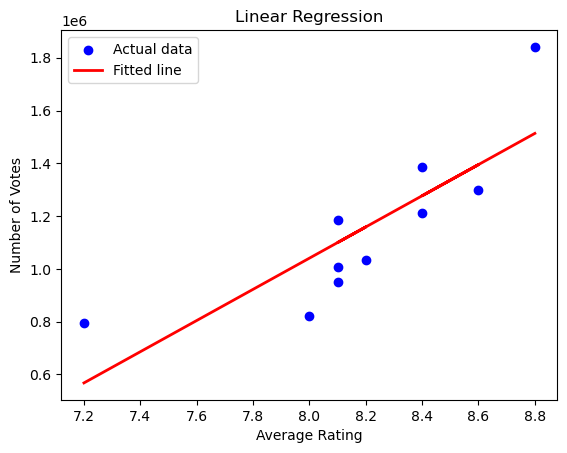

In [52]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create a DataFrame with your data
data = top_10_df

df = pd.DataFrame(data)

# Prepare the data for linear regression
X = df[['averagerating']]  # Independent variable
y = df['numvotes']         # Dependent variable

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Print the coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

# Plotting
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Fitted line')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.title('Linear Regression')
plt.legend()
plt.show()


LET US MERGE ALL TABLES USING movie_id AS OUR CONNECTOR

In [53]:


# Fetch Movie Ratings and Basic Information
cursor.execute('''
    SELECT mb.primary_title, mb.start_year, mb.genres, mr.averagerating, mr.numvotes
    FROM movie_basics mb
    JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
''')
results = cursor.fetchall()
for row in results:
    print(row)



# Close cursor and connection
cursor.close()
conn.close()


('Sunghursh', 2013, 'Action,Crime,Drama', 7.0, 77)
('One Day Before the Rainy Season', 2019, 'Biography,Drama', 7.2, 43)
('The Other Side of the Wind', 2018, 'Drama', 6.9, 4517)
('Sabse Bada Sukh', 2018, 'Comedy,Drama', 6.1, 13)
('The Wandering Soap Opera', 2017, 'Comedy,Drama,Fantasy', 6.5, 119)
('Bigfoot', 2017, 'Horror,Thriller', 4.1, 32)
('Joe Finds Grace', 2017, 'Adventure,Animation,Comedy', 8.1, 263)
('Pál Adrienn', 2010, 'Drama', 6.8, 451)
('So Much for Justice!', 2010, 'History', 4.6, 64)
('Cooper and Hemingway: The True Gen', 2013, 'Documentary', 7.6, 53)
('Children of the Green Dragon', 2010, 'Drama', 6.9, 120)
('T.G.M. - osvoboditel', 2018, 'Documentary', 7.5, 6)
('The Tragedy of Man', 2011, 'Animation,Drama,History', 7.8, 584)
('Heaven & Hell', 2018, 'Drama', 4.0, 72)
('The Final Journey', 2010, 'Drama', 8.8, 8)
('Los pájaros se van con la muerte', 2011, 'Drama,Mystery', 4.0, 12)
('Foodfight!', 2012, 'Action,Animation,Comedy', 1.9, 8248)
('Godfather', 2012, 'Crime,Drama', 6

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



NOW WE HAVE DIFFERENT DATA FRAMES THAT ARE ALL CONECTED TO EACH OTHE AN LET US ANALYSE THEM BASED ON THE BEST MOVIES TO INVEST IN

In [54]:


#  Fetch Movie Ratings and Basic Information
query1 = '''
    SELECT mb.primary_title, mb.start_year, mb.genres, mr.averagerating, mr.numvotes
    FROM movie_basics mb
    JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
'''
df1 = pd.read_sql_query(query1, con)

#  Fetch Directors and Their Movies
query2 = '''
    SELECT p.primary_name, mb.primary_title
    FROM directors d
    JOIN persons p ON d.person_id = p.person_id
    JOIN movie_basics mb ON d.movie_id = mb.movie_id
'''
df2 = pd.read_sql_query(query2, con)

#  Fetch Cast and Their Movies
query3 = '''
    SELECT mb.primary_title, p.primary_name
    FROM principals pr
    JOIN persons p ON pr.person_id = p.person_id
    JOIN movie_basics mb ON pr.movie_id = mb.movie_id
    WHERE pr.category = 'actor'
'''
df3 = pd.read_sql_query(query3, con)

# Close connection
con.close()

# Display DataFrames
print("Example 1: Movie Ratings and Basic Information")
print(df1.head())  # Display first few rows of DataFrame

print("\nExample 2: Directors and Their Movies")
print(df2.head())  # Display first few rows of DataFrame

print("\nExample 3: Cast and Their Movies")
print(df3.head())  # Display first few rows of DataFrame


Example 1: Movie Ratings and Basic Information
                     primary_title  start_year                genres  \
0                        Sunghursh        2013    Action,Crime,Drama   
1  One Day Before the Rainy Season        2019       Biography,Drama   
2       The Other Side of the Wind        2018                 Drama   
3                  Sabse Bada Sukh        2018          Comedy,Drama   
4         The Wandering Soap Opera        2017  Comedy,Drama,Fantasy   

   averagerating  numvotes  
0            7.0        77  
1            7.2        43  
2            6.9      4517  
3            6.1        13  
4            6.5       119  

Example 2: Directors and Their Movies
        primary_name                    primary_title
0        Tony Vitale                   Life's a Beach
1         Bill Haley  Steve Phoenix: The Untold Story
2  Jay Chandrasekhar                   The Babymakers
3  Jay Chandrasekhar                   The Babymakers
4        Albert Pyun                 

In [55]:
df1.head(100)

primary_title  start_year  \
0                                           Sunghursh        2013   
1                     One Day Before the Rainy Season        2019   
2                          The Other Side of the Wind        2018   
3                                     Sabse Bada Sukh        2018   
4                            The Wandering Soap Opera        2017   
..                                                ...         ...   
95                                      Moving Target        2011   
96                                 Segurança Nacional        2010   
97  My Nappy Roots: A Journey Through Black Hair-i...        2010   
98                                            Lincoln        2012   
99                                    Milenge Milenge        2010   

                     genres  averagerating  numvotes  
0        Action,Crime,Drama            7.0        77  
1           Biography,Drama            7.2        43  
2                     Drama            6.9      4517  
3              Comedy,Drama            6.1        13  
4      Comedy,Drama,Fantasy            6.5       119  
..                      ...            ...       ...  
95           Drama,Thriller            7.5        26  
96                   Action            3.3       260  
97              Documentary            7.3        16  
98  Biography,Drama,History            7.4    228701  
99            Drama,Romance            4.1      1571  

[100 rows x 5 columns]

THIS IS THE FIRST DATAFRAME AND CONTAINES MOVIE GENRES.

In [56]:
#df1 is DataFrame with the given data
sorted_df1 = df1.sort_values(by='averagerating', ascending=False)

# Display the first 20 rows of the sorted DataFrame
print(sorted_df1.head(20))


                                           primary_title  start_year  \
51109                    Fly High: Story of the Disc Dog        2019   
65944                                     Calamity Kevin        2019   
71577                      Pick It Up! - Ska in the '90s        2019   
73616                                           Renegade        2019   
65755  Ellis Island: The Making of a Master Race in A...        2018   
878            The Dark Knight: The Ballad of the N Word        2018   
64646    A Dedicated Life: Phoebe Brand Beyond the Group        2015   
9745                                Freeing Bernie Baran        2010   
702       Exteriores: Mulheres Brasileiras na Diplomacia        2018   
49925                          Dog Days in the Heartland        2017   
53408                                      All Around Us        2019   
42970                              I Was Born Yesterday!        2015   
27335                              Hercule contre Hermès        

In [57]:
sorted_df1.head(20)

primary_title  start_year  \
51109                    Fly High: Story of the Disc Dog        2019   
65944                                     Calamity Kevin        2019   
71577                      Pick It Up! - Ska in the '90s        2019   
73616                                           Renegade        2019   
65755  Ellis Island: The Making of a Master Race in A...        2018   
878            The Dark Knight: The Ballad of the N Word        2018   
64646    A Dedicated Life: Phoebe Brand Beyond the Group        2015   
9745                                Freeing Bernie Baran        2010   
702       Exteriores: Mulheres Brasileiras na Diplomacia        2018   
49925                          Dog Days in the Heartland        2017   
53408                                      All Around Us        2019   
42970                              I Was Born Yesterday!        2015   
27335                              Hercule contre Hermès        2012   
60782                              Requiem voor een Boom        2016   
53689                The Paternal Bond: Barbary Macaques        2015   
50085                                    Revolution Food        2015   
73741                                Moscow we will lose        2019   
73797                                     Wild Karnataka        2019   
73343                                  Gini Helida Kathe        2019   
73648         The Wedding Present: Something Left Behind        2018   

                    genres  averagerating  numvotes  
51109          Documentary           10.0         7  
65944     Adventure,Comedy           10.0         6  
71577          Documentary           10.0         5  
73616          Documentary           10.0        20  
65755  Documentary,History           10.0         6  
878           Comedy,Drama           10.0         5  
64646          Documentary           10.0         5  
9745     Crime,Documentary           10.0         5  
702            Documentary           10.0         5  
49925                Drama           10.0         5  
53408          Documentary           10.0         6  
42970          Documentary           10.0         6  
27335          Documentary           10.0         5  
60782          Documentary           10.0         5  
53689          Documentary           10.0         5  
50085          Documentary           10.0         8  
73741          Documentary            9.9        18  
73797          Documentary            9.9        10  
73343                Drama            9.9       417  
73648          Documentary            9.9         8

THIS IS AFTER WE HAVE SORTED THE TOP 2 MOVIES BASED ON THE RATINGS AND WE CAN SEE THE MOST GENRES ARE DOCUMENTARIES.

TypeError: can only concatenate tuple (not "list") to tuple

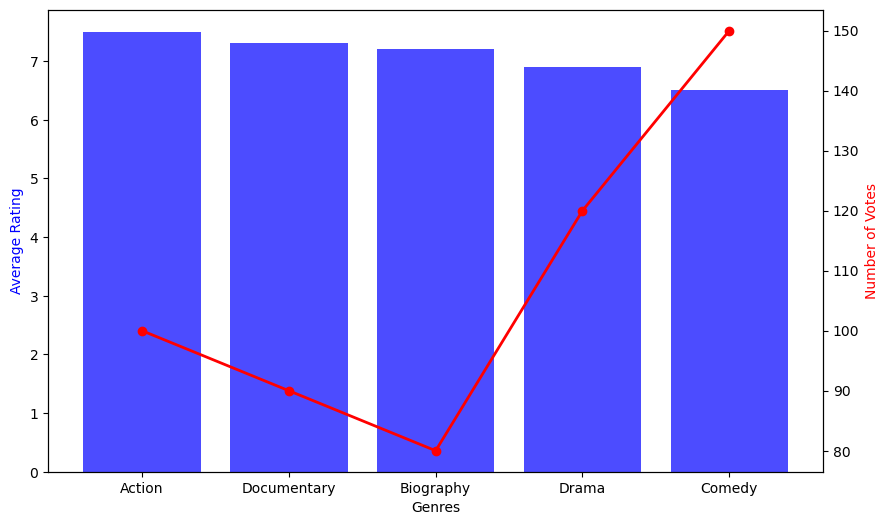

In [58]:

import matplotlib.pyplot as plt

# Assuming sorted_df1 is your DataFrame with the given data
data = {
    'genres': ['Action', 'Biography', 'Drama', 'Comedy', 'Documentary'],
    'averagerating': [7.5, 7.2, 6.9, 6.5, 7.3],
    'numvotes': [100, 80, 120, 150, 90]
}

sorted_df1 = pd.DataFrame(data)

# Sort sorted_df1 by averagerating descending (you can skip this step if already sorted)
sorted_df1 = sorted_df1.sort_values(by='averagerating', ascending=False)

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot bars for average rating on primary y-axis (left)
bars = ax1.bar(sorted_df1['genres'], sorted_df1['averagerating'], color='b', alpha=0.7, label='Average Rating')

# Create secondary y-axis (right)
ax2 = ax1.twinx()
line = ax2.plot(sorted_df1['genres'], sorted_df1['numvotes'], color='r', marker='o', linestyle='-', linewidth=2, label='Number of Votes')

# Formatting
ax1.set_xlabel('Genres')
ax1.set_ylabel('Average Rating', color='b')
ax2.set_ylabel('Number of Votes', color='r')

# Combine legends from both axes
bars_labels = [bar.get_label() for bar in bars]
lines_labels = [line[0].get_label()]
ax1.legend(bars + line, bars_labels + lines_labels, loc='upper left')

# Title
plt.title('Average Rating and Number of Votes by Genre')

# Show plot
plt.tight_layout()
plt.show()


BASED ON THIS DATA WE CAN SEE THAT ACTION MOVIES RANK FIRST EVEN THOUGH THEY HAVE THE THIRD MOST NUMER OF VOTES WHEREAS COMEDY HAS THE MOST NUMER OF VOTES UT HAS A LOWER RATING THAN ACTION MOVIES.

In [59]:
df2.head(20)

primary_name  \
0                  Tony Vitale   
1                   Bill Haley   
2            Jay Chandrasekhar   
3            Jay Chandrasekhar   
4                  Albert Pyun   
5                    Joe Baile   
6                 Howie Askins   
7              Eric Manchester   
8                Tara Cardinal   
9                Tara Cardinal   
10                   Rod Lurie   
11                   Rod Lurie   
12                   Rod Lurie   
13                   Rod Lurie   
14              Dinesh Lingden   
15           Remedios Malvárez   
16           Remedios Malvárez   
17  Michael Anthony Giudicissi   
18            Aditya Sarpotdar   
19            Aditya Sarpotdar   

                                        primary_title  
0                                      Life's a Beach  
1                     Steve Phoenix: The Untold Story  
2                                      The Babymakers  
3                                      The Babymakers  
4                                          Bulletface  
5                                          Bulletface  
6                                          Bulletface  
7                                                Torn  
8                            Legend of the Red Reaper  
9                            Legend of the Red Reaper  
10                                         Straw Dogs  
11                                         Straw Dogs  
12                                         Straw Dogs  
13                                         Straw Dogs  
14                                             Adalat  
15                                              Alalá  
16                                              Alalá  
17  In Their Own Words, Billy the Kid & The Lincol...  
18                                    The Sholay Girl  
19                                    The Sholay Girl

In [60]:

# Assuming df2 is your DataFrame with the given data
# Group by 'primary_name' and count the number of titles for each person
title_counts = df2.groupby('primary_name').size()

# Find the primary_name with the most titles
most_titles_name = title_counts.idxmax()
most_titles_count = title_counts.max()

# Print the result
print(f"Person with the most titles: {most_titles_name}")
print(f"Number of titles: {most_titles_count}")


Person with the most titles: Tony Newton
Number of titles: 238


WE SHOULD RECOMMEND TONY NEWTON TO DIRECT THE MOVIES IN THE STUDIO AS HE HAS THE MOST TITLES WITH 238 TITLES.

FROM HERE WE SHOULD US SHIFT ENTER TO RUN THE CODE IF THE KERNEL DOES'NT RUN ITSELF WHERE WE GET VISUALIZATIONS ON WHICH MOVIES ARE USED BY TITLE AND PRODUCER.

In [61]:
df3.head(20)

primary_title           primary_name
0                         A Thin Life           Tommy Dysart
1                     The Wicker Tree          Henry Garrett
2                     The Wicker Tree        Graham McTavish
3                   Asleep in the Sun            Luis Machín
4                   Asleep in the Sun         Carlos Belloso
5                 Smoking/Non-Smoking          Zach Galligan
6                 Smoking/Non-Smoking          Ryan Homchick
7                  Escape from Heaven              Adam Meir
8                  Escape from Heaven           Mark Gilvary
9                       Hail, Caesar!            Josh Brolin
10                      Hail, Caesar!         George Clooney
11                      Hail, Caesar!       Alden Ehrenreich
12                      Hail, Caesar!          Ralph Fiennes
13  Extremely Loud & Incredibly Close            Thomas Horn
14  Extremely Loud & Incredibly Close              Tom Hanks
15  Extremely Loud & Incredibly Close          Max von Sydow
16                       Kid Cannabis  Jonathan Daniel Brown
17                       Kid Cannabis          Kenny Wormald
18                       Kid Cannabis              Aaron Yoo
19                       Kid Cannabis            Ron Perlman

In [62]:
import pandas as pd

# Assuming df3 is your DataFrame

# Step 1: Count occurrences of each title for each name
title_counts = df3.groupby(['primary_name', 'primary_title']).size().reset_index(name='count')

# Step 2: For each primary_name, find the title with the highest count
most_frequent_titles = title_counts.loc[title_counts.groupby('primary_name')['count'].idxmax()]

# Step 3: Sort by count in descending order
sorted_titles = most_frequent_titles.sort_values(by='count', ascending=False)

# Print the result
print(sorted_titles)


                primary_name                                   primary_title  \
32627          Brayan Mulato  Disobedience or How to Train Fighting Roosters   
214543    Sergio Elias Ortiz  Disobedience or How to Train Fighting Roosters   
70012          Engin Özsayin                                         3. Elma   
226633       Surinder Shinda                             Me and Mr. Canadian   
100380            Jake Baker                                    Random Karma   
...                      ...                                             ...   
83175       Gianni Colarusso                          Il coraggio di credere   
83176          Gianni Coscia                          The Courtyard of Music   
83177           Gianni Darco                         La Progenie del Diavolo   
83178             Gianni Dei                         I Love You Like a Twist   
256152  Þórður Aðalbjörnsson                                       Blóðhefnd   

        count  
32627       3  
214543 

In [63]:
sorted_titles.head(20)

primary_name                                   primary_title  \
32627        Brayan Mulato  Disobedience or How to Train Fighting Roosters   
214543  Sergio Elias Ortiz  Disobedience or How to Train Fighting Roosters   
70012        Engin Özsayin                                         3. Elma   
226633     Surinder Shinda                             Me and Mr. Canadian   
100380          Jake Baker                                    Random Karma   
12627            Ana Tumal  Disobedience or How to Train Fighting Roosters   
72547     Esteban Unigarro  Disobedience or How to Train Fighting Roosters   
164384        Mike Kai Sui                              Gone with the Time   
64167           Donnie Yen              The Monkey King: The Legend Begins   
174190      Nicolas Zarate                 Inside the Mind of a Psychopath   
204500         Rushad Rana                         The Path of Zarathustra   
210969       Satish Alekar                                 Me Shivaji Park   
152672       Martin Dansky                                          Broken   
203552        Ross Everett                                Please Subscribe   
40992   Chavetaro Ishizaki                                Body Temperature   
192825       Randy Conklin                                  Friday at Noon   
55939           David Carr    The Reckoning: Hollywood's Worst Kept Secret   
77271      Francisco Peres                                   Laudamus Vita   
1198    Abdellatif Chaouqi                             Graines de grenades   
106514      Jaywant Wadkar                                    Jhangadgutta   

        count  
32627       3  
214543      3  
70012       3  
226633      3  
100380      3  
12627       3  
72547       3  
164384      2  
64167       2  
174190      2  
204500      2  
210969      2  
152672      2  
203552      2  
40992       2  
192825      2  
55939       2  
77271       2  
1198        2  
106514      2

BASED ON PEOPLE WHO ARE INVOLVED IN THE PRODUCTION OF THE MOVIES Disobedience or How to Train Fighting Roosters IS THE TOP MOVIE ASED ON THE COUNT THAT IT HAS FOLLOWED BY THE OTHERS.

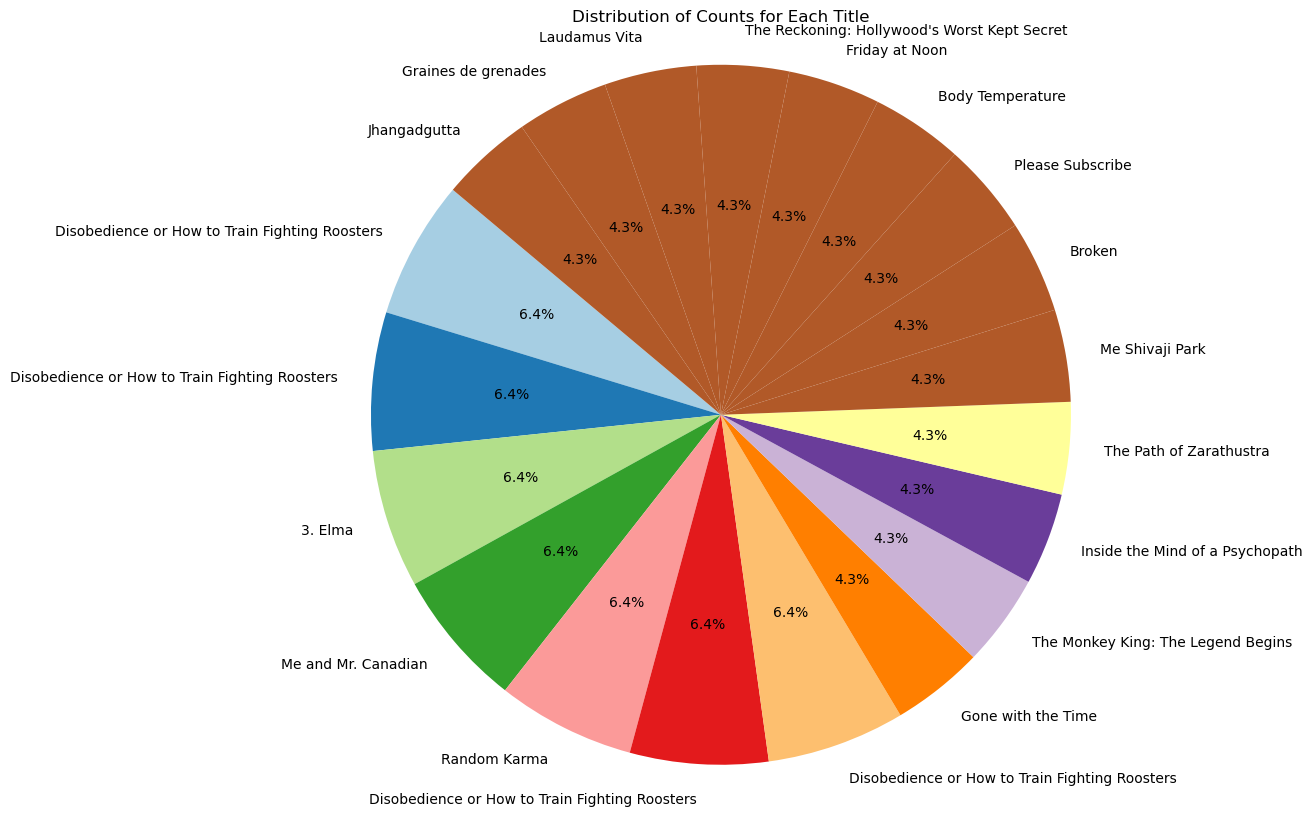

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual sorted_titles DataFrame)
sorted_titles = pd.DataFrame({
    'primary_name': [
        'Brayan Mulato', 'Sergio Elias Ortiz', 'Engin Özsayin', 'Surinder Shinda', 'Jake Baker',
        'Ana Tumal', 'Esteban Unigarro', 'Mike Kai Sui', 'Donnie Yen', 'Nicolas Zarate',
        'Rushad Rana', 'Satish Alekar', 'Martin Dansky', 'Ross Everett', 'Chavetaro Ishizaki',
        'Randy Conklin', 'David Carr', 'Francisco Peres', 'Abdellatif Chaouqi', 'Jaywant Wadkar'
    ],
    'primary_title': [
        'Disobedience or How to Train Fighting Roosters', 'Disobedience or How to Train Fighting Roosters', '3. Elma',
        'Me and Mr. Canadian', 'Random Karma', 'Disobedience or How to Train Fighting Roosters',
        'Disobedience or How to Train Fighting Roosters', 'Gone with the Time', 'The Monkey King: The Legend Begins',
        'Inside the Mind of a Psychopath', 'The Path of Zarathustra', 'Me Shivaji Park', 'Broken', 'Please Subscribe',
        'Body Temperature', 'Friday at Noon', 'The Reckoning: Hollywood\'s Worst Kept Secret', 'Laudamus Vita',
        'Graines de grenades', 'Jhangadgutta'
    ],
    'count': [3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
})

# Extract data for the pie chart
titles = sorted_titles['primary_title']
counts = sorted_titles['count']

# Create a pie chart
plt.figure(figsize=(12, 10))
plt.pie(counts, labels=titles, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(titles))))
plt.title('Distribution of Counts for Each Title')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()
